# 房屋价格预测
# 评价指标：RMSE均方根误差 （对异常值敏感）

# 1 读取数据，认识数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df=pd.read_csv("./dataset/train.csv",index_col=0)  #去掉id索引列
test_df=pd.read_csv("./dataset/test.csv",index_col=0)
train_df.head()
#查看标签值的分布
prices=pd.DataFrame({'price':train_df['SalePrice'],'log(price+1)':np.log1p(train_df['SalePrice'])})
prices.hist()  #画直方图
plt.show()
y_train=np.log1p(train_df.pop('SalePrice'))  #作为标签值
y_train.head()
#然后合并train和test数据集,此时train数据集已经没有SalePrice这一列了
df=pd.concat((train_df,test_df),axis=0)
df.shape

<Figure size 640x480 with 2 Axes>

(2919, 79)

因为label本身并不平滑，为了我们分类器的学习更加准确，我们需要首先把label给**平滑化（正态化）**。我在这里使用的是**log1p, 也就是 log(x+1)**。要注意的是我们这一步把数据平滑化了，在最后算结果的时候，**还要把预测到的平滑数据给变回去，那么log1p()的反函数就是expm1()**，后面用到时再具体细说。



# 2 数据预处理

In [3]:
print(pd.isnull(df).sum())  #查看数据中各特征缺失值情况

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


In [4]:
#上面不方便观察，故先查看缺失值最多的10个特征
df.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
dtype: int64

In [5]:
#为了更清楚的表示，我们用缺失率来考察缺失情况：
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'缺失率': df_na})
missing_data.head(10)


,缺失率
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

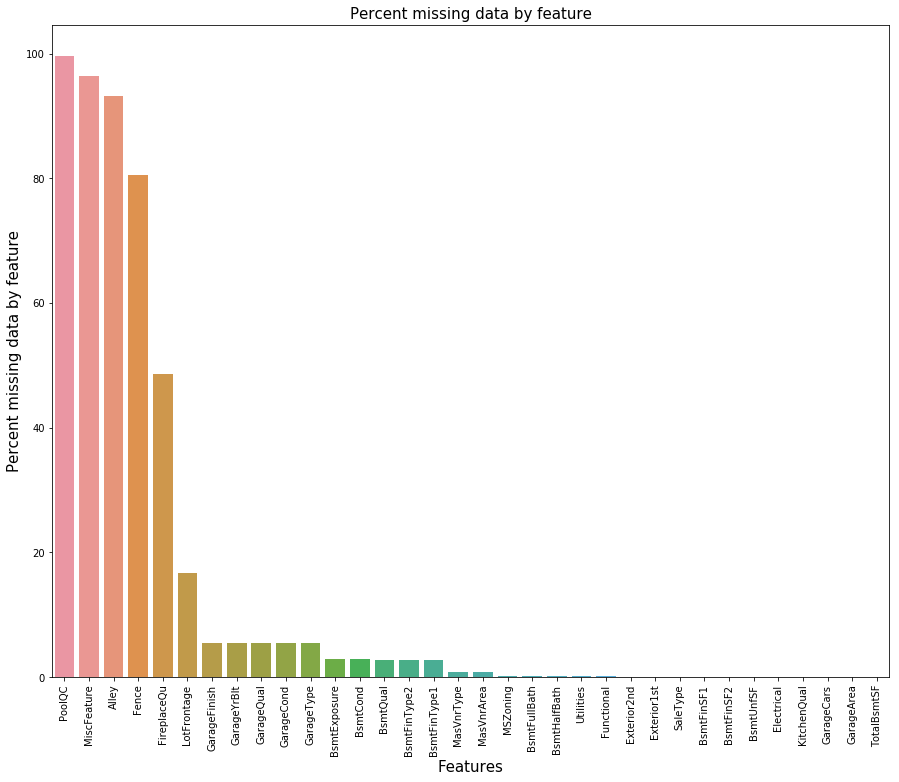

In [7]:
#对其可视化
import seaborn as sns
f,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')   #横坐标的值旋转90°
sns.barplot(x=df_na.index,y=df_na)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent missing data by feature',fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


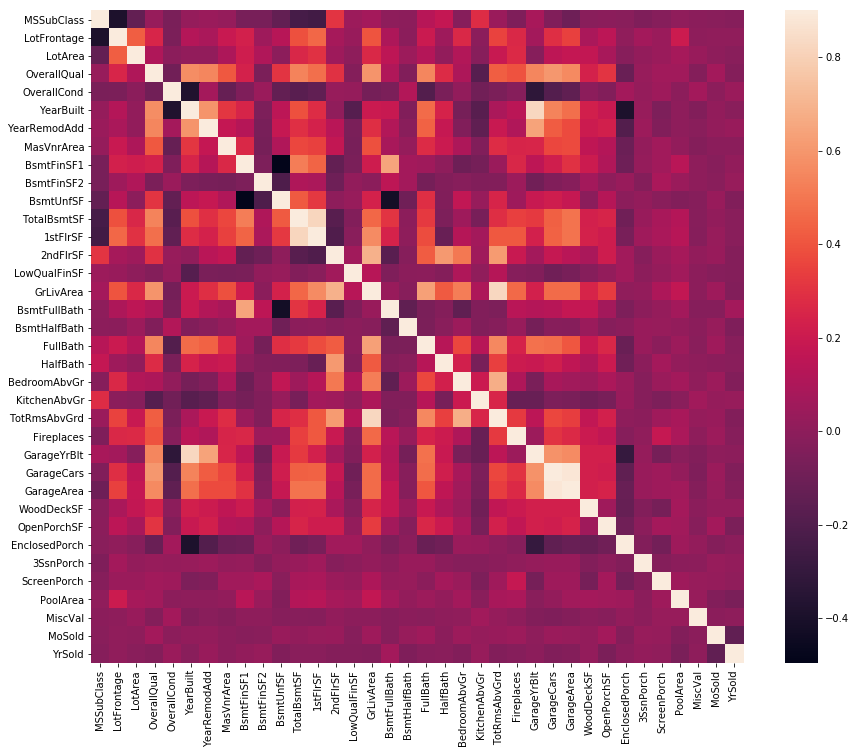

In [13]:
#对每个特征进行相关性分析，查看热力图：
corrmat=train_df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,vmax=0.9,square=True)

#我们看到有些特征相关性大，容易造成过拟合现象，因此需要进行剔除。在下一篇的数据挖掘篇我们来对这些特征进行处理并训练模型。

